In [ ]:
import numpy as np
import pandas as pd
import os

import pickle

In [ ]:
total_files = 0
non_empty = 0

frames = []

directory = "DougMonteCarlo/5884868"

for entry in os.scandir(directory):
    total_files += 1
    
    array = np.load(entry.path, allow_pickle=True)
    
    if len(array) != 0:
        #convert to pd dataframe
        columns = list(array.dtype.names)
        columns[4] = "DepositedEnergyBy_"
        df = pd.DataFrame(data=array, columns=columns)
        
        df['Channel'] += 1
        df['Cluster'] = non_empty
        df['MaxTime'] = 0
        non_empty += 1
        frames.append(df)
        
eventdf = pd.concat(frames)
eventdf



In [ ]:
len(eventdf['Channel'].unique())

In [ ]:
%run DataAnalysis.ipynb

data = DataAnalysis()
data.eventdf = eventdf
data.make_clusterDF()

data.get_clusterdf()

1284


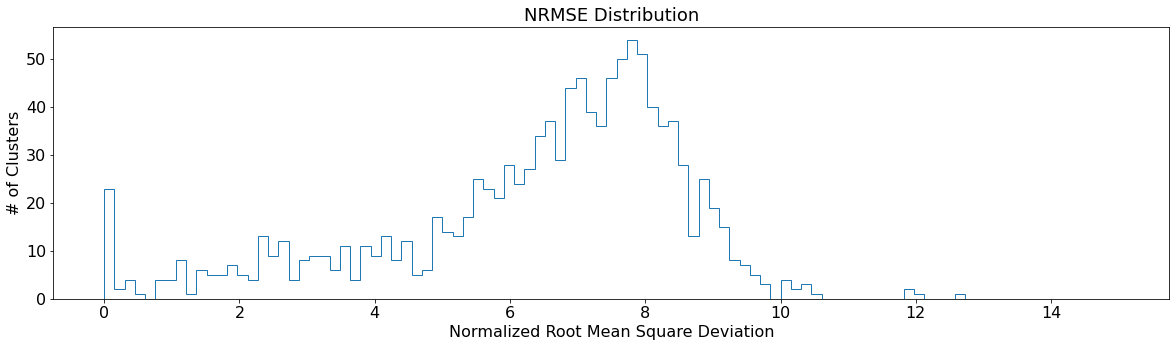

In [211]:
more_than_two = data.get_clusterdf()[data.get_clusterdf()['Channels'] > 2]
print(len(more_than_one))

plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')
array=plt.hist(more_than_two['NRMSE'], np.linspace(0,15,100), histtype='step')

#line=plt.axvline(1)
#plt.gca().set_yscale("log")

In [225]:
zero = data.get_clusterdf()[data.get_clusterdf()['NRMSE'] < .01]
zero[zero['Channels'] != 1].head(10)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
47,47,3,3,0,0,1.688823e-15,0.0,0.0,0,10
108,108,4,4,0,0,0.000000e+00,0.0,0.0,0,9
225,225,3,3,0,0,1.688823e-15,0.0,0.0,0,10
333,333,4,4,0,0,0.000000e+00,0.0,0.0,0,9
356,356,4,4,0,0,0.000000e+00,0.0,0.0,0,9
462,462,4,4,0,0,0.000000e+00,0.0,0.0,0,9
526,526,3,3,0,0,1.688823e-15,0.0,0.0,0,10
596,596,5,5,0,0,0.000000e+00,0.0,0.0,0,8
598,598,4,4,0,0,0.000000e+00,0.0,0.0,0,9
669,669,3,3,0,0,0.000000e+00,0.0,0.0,0,10


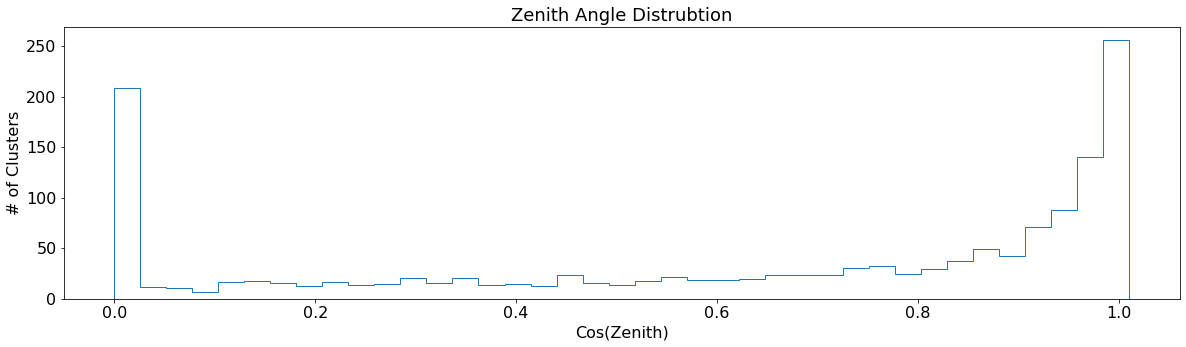

In [221]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1.01,40), histtype='step')

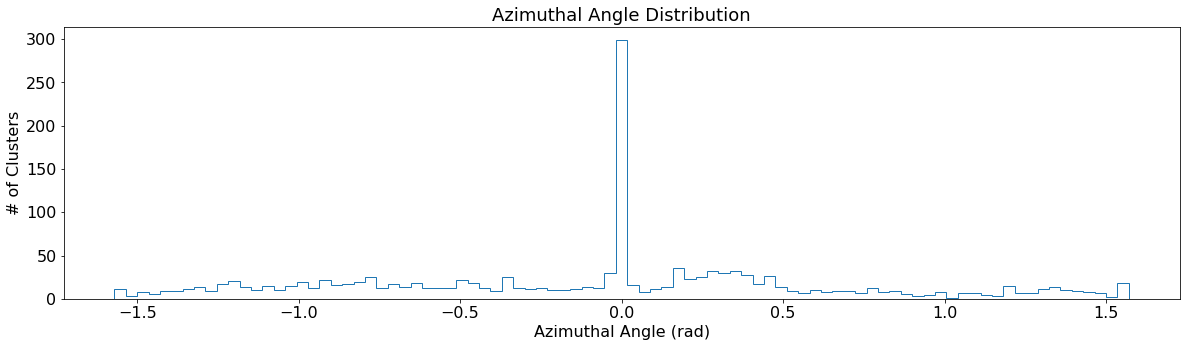

In [222]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(data.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,90), histtype='step')

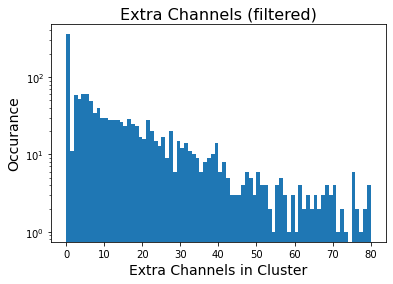

In [226]:
plt.figure()
plt.title("Extra Channels (filtered)", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,80,81))
plt.gca().set_yscale("log")

In [ ]:
#filename = ""
#data = np.load(filename, allow_pickle=True)
data = non_empty[3]

columns = list(d2.dtype.names)
columns[4] = "DepositedEnergyBy_"
df = pd.DataFrame(data=data, columns=columns)

In [ ]:
#Join58848683809_MuonPlus_N1_E164180.668_C15.853,5.375,34.8_D3.0,-0.719,-0.719_Qshields.npy
df

In [ ]:
%run DataAnalysis.ipynb

for i in range(5):
    #data = np.load(filename, allow_pickle=True)
    data = non_empty[i]

    columns = list(d2.dtype.names)
    columns[4] = "DepositedEnergyBy_"
    df = pd.DataFrame(data=data, columns=columns)
    
    df['Channel'] += 1
    hit_channels = df['Channel'].values
    print(hit_channels)
    coords = DataAnalysis().load_coords()

    hit_channel_coords = np.array([coords[channel] for channel in hit_channels])

    plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.set_proj_type('ortho')

    ax.scatter3D(*hit_channel_coords.T)
    #ax.plot3D(*linepoints.T)

    plt.xlim([-350,350])
    plt.ylim([-350,350])
    ax.set_zlim([-350,350])

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.view_init(15, 45)

    plt.show()

In [ ]:
%run DataAnalysis.ipynb
linepoints = np.array([[158.53, 53.75, 348.0],[.302841, .625561, -0.719]])
hit_channels = DataAnalysis().channelcollisions(linepoints)
print(hit_channels)
coords = DataAnalysis().load_coords()

hit_channel_coords = np.array([coords[channel] for channel in hit_channels])

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

ax.scatter3D(*hit_channel_coords.T)
ax.plot3D(*linepoints.T)

plt.xlim([-350,350])
plt.ylim([-350,350])
ax.set_zlim([-350,350])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(15, 0)

plt.show()





%run DataAnalysis.ipynb
hit_channels = df['Channel'].values
print(hit_channels)
coords = DataAnalysis().load_coords()

hit_channel_coords = np.array([coords[channel] for channel in hit_channels])

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

ax.scatter3D(*hit_channel_coords.T)
ax.plot3D(*linepoints.T)

plt.xlim([-350,350])
plt.ylim([-350,350])
ax.set_zlim([-350,350])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(15, 0)

plt.show()

In [ ]:
import os

In [ ]:
os.stat('somefile.txt')